In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,log_loss,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import missingno
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import matplotlib as mpl


plt.style.use('dark_background')
sns.set_palette("bright")
mpl.rcParams['lines.linewidth'] = 4

In [2]:
import tkinter as tk
from tkinter import messagebox as mb
from tkinter import font

root = tk.Tk()
font1 = font.Font(name='TkCaptionFont', exists=True)
font1.config(family='newspaper', size=15)
root.withdraw()
mb.showwarning("Warning",'''If the plots do not show up properly (without axes or labels) please run all cells twice:
Cell->Run All (Execute twice)
Or else:
Kernel-> Restart & Run All
Cell -> Run All

If the plots still do not show up, comment out plt.style.use('dark_background') then, Kernel-> Restart & Run All''')
root.deiconify()
root.withdraw()

''

# Loading Data

In [3]:
df = pd.read_excel('Dataset_Question2.xlsx')
df.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
0,406.86,17.66,121.83,2109.20,0.1033,Pass
1,693.39,24.66,133.18,3138.96,0.3785,Pass
2,523.10,23.23,146.55,1058.24,0.4799,Fail
3,612.86,40.97,94.44,1325.12,0.3147,Fail
4,500.28,37.44,185.48,2474.51,0.2284,Pass


In [4]:
df.describe()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,546.76643,25.493270,125.029060,2295.797770,0.302692
std,86.85878,14.252407,43.508159,763.680625,0.116062
min,400.31000,1.060000,50.030000,1002.530000,0.100300
25%,469.73500,12.725000,88.587500,1635.682500,0.199075
50%,545.80000,25.375000,124.590000,2268.710000,0.308850
75%,618.87750,37.820000,162.562500,2983.692500,0.401625
max,699.87000,49.890000,199.960000,3595.620000,0.499600


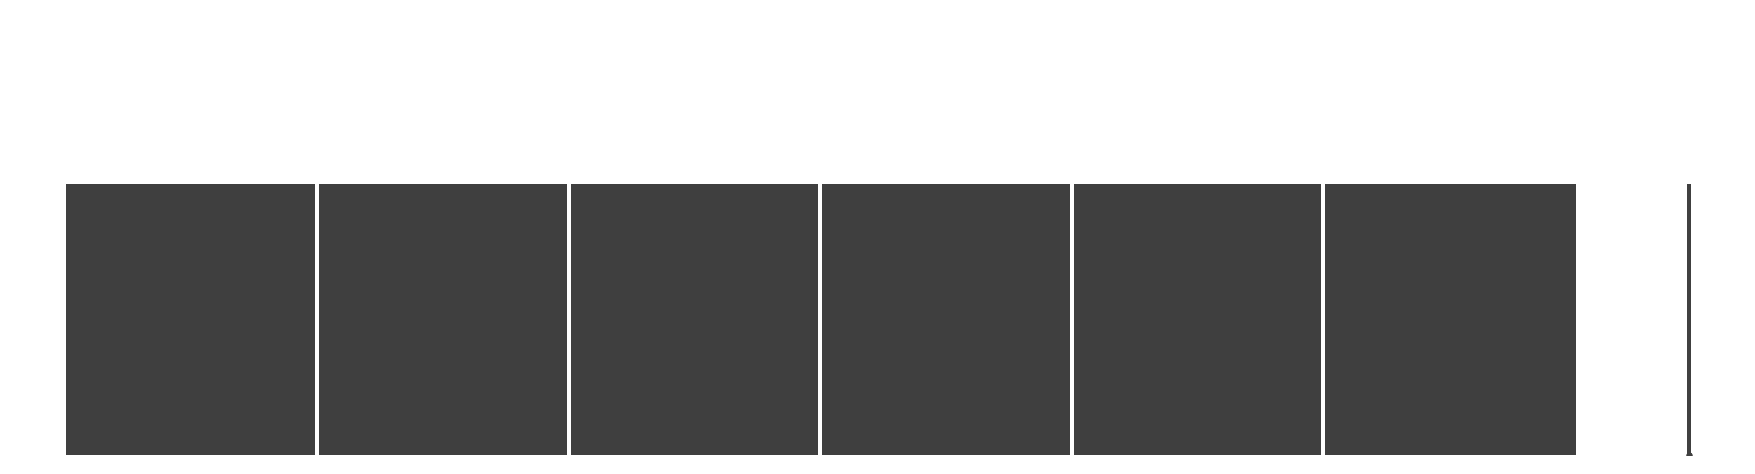

In [5]:
missingno.matrix(df, figsize = (30,5))

In [6]:
x = df.drop('Test',axis=1)
y = df['Test'].values
y=np.expand_dims(y,axis=1)

In [7]:
x=x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99),axis=1)

<font face='Courier New' size=3 color= Blue>  
This shows us that there are no missing values in the data


In [8]:
y.shape

(1000, 1)

# Analysing Features

In [9]:
stats = df.describe()
stats.loc['variance'] = df.var().tolist()
stats.loc['skewness'] = df.skew().tolist()
stats.loc['kurtosis'] = df.kurtosis().tolist()
pd.DataFrame(stats)

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,546.766430,25.493270,125.029060,2295.797770,0.302692
std,86.858780,14.252407,43.508159,763.680625,0.116062
min,400.310000,1.060000,50.030000,1002.530000,0.100300
25%,469.735000,12.725000,88.587500,1635.682500,0.199075
50%,545.800000,25.375000,124.590000,2268.710000,0.308850
75%,618.877500,37.820000,162.562500,2983.692500,0.401625
max,699.870000,49.890000,199.960000,3595.620000,0.499600
variance,7544.447741,203.131114,1892.959914,583208.097420,0.013470
skewness,0.069251,-0.021071,0.018500,0.037458,-0.025999


<font face='Courier New' size=3 color= Blue>  
- This table gives the minimum, maximum, mean, standard deviation and the quartiles of the data
- The data has 1000 samples and 5 features
- All the features have negative kurtosis which indicates that the distribution has lighter tails and a flatter peak than the normal distribution.
- All features have skewness between between −½ and +½, the distribution is approximately symmetric.

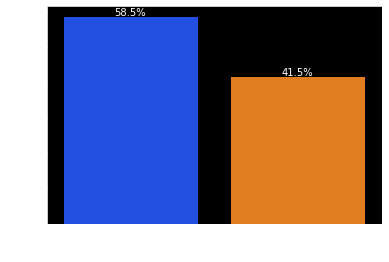

In [10]:
ax=sns.countplot(x='Test', data=df)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/10), (p.get_x()+0.3, p.get_height()+5))
#_ = ax.set_xticklabels(map('{:.1f}'.format, ax.xaxis.get_majorticklocs()))

<font face='Courier New' size=3 color= Blue>  
- The dataset is almost balanced as it has 41.5% Fail values and 58.5% Pass values

In [11]:
#Train,test and validation split
xtrain,xtest,ytrain,ytest = train_test_split(x,y ,test_size=0.3,stratify=y,random_state=0)
xtrain.shape,xtest.shape

((700, 5), (300, 5))

In [12]:
def plot_df(df,total=5,func=sns.distplot, ncols = 2, nrows = 3):
    figure,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(14,5))
    cols = df.columns
    for i,ax in zip(range(total),axes.flat):
        func(df[cols[i]],ax=ax)
    plt.show()

In [13]:
ss = MinMaxScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [14]:
le = LabelEncoder()
ytrain = np.expand_dims(le.fit_transform(ytrain),axis=1)
ytest = np.expand_dims(le.fit_transform(ytest),axis=1)
ytrain.shape

/home/shan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(700, 1)

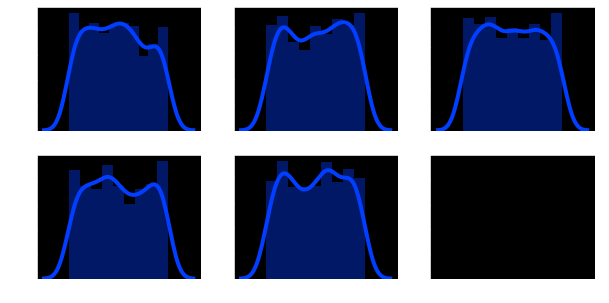

In [15]:
figure,axes=plt.subplots(nrows=2,ncols=3,figsize=(10,5))
cols = x.columns
for i,ax in zip(range(5),axes.flat):
    sns.distplot(xtrain[:,i],ax=ax)
plt.show()


<font face='Courier New' size=3 color= Blue>  
- We split the data into train and test sets such that test data is 30% of the original data
- We standardise the data such that the distribution has mean = 0 and variance = 1
- We notice that the distributions are not normal and as explained by the skewness values, the distributions are approximately symmetric

# Plotting

## <font face='Courier New' size=5 color=Green>__Analysing total correlation and class-wise correlation__</font>

(5.5, -0.5)

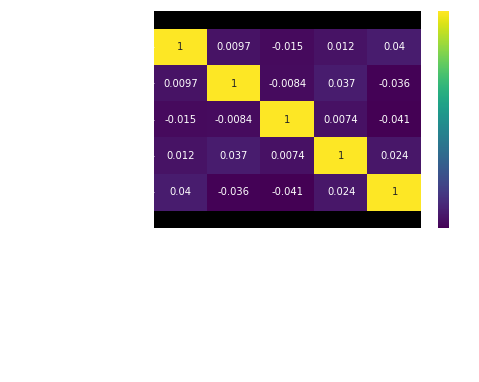

In [16]:
corr = df.corr()
ax=sns.heatmap(corr,cmap='viridis',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(5.5, -0.5)

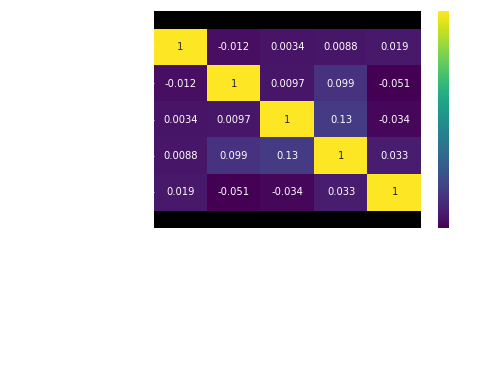

In [17]:
corr_pass = df.groupby('Test').get_group('Pass').corr()
ax=sns.heatmap(corr_pass,cmap='viridis',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(5.5, -0.5)

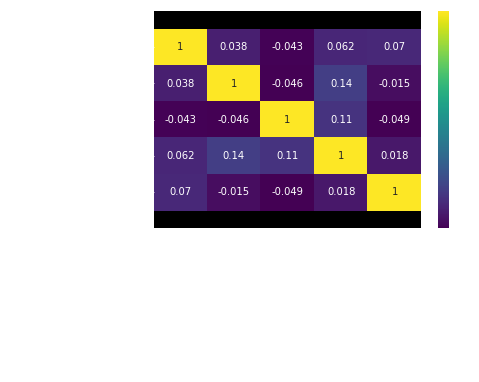

In [18]:
corr_fail= df.groupby('Test').get_group('Fail').corr()
ax=sns.heatmap(corr_fail,cmap='viridis',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<font face = "Courier New" size = "3" color=Blue>

- In the total correlation map, none of the features have correlation higher than 0.04
- In the class-wise correlation map, the correlation is a little higher, 0.14 (pressure vs coolant flow rate)
- However, these correlations are extremely small and hence the features are considered to be uncorrelated
</font>

## <font face='Courier New' size=5 color=Green>__Difference in features: Class-wise__</font>

/home/shan/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds


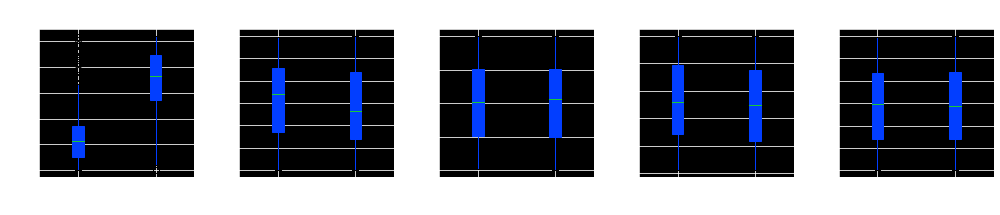

In [19]:
fig, ax_new = plt.subplots(1,5, sharey=False, figsize=(14,3))
charts=df.boxplot(by='Test', figsize=(14,50),ax=ax_new,patch_artist=True,return_type='axes')
plt.tight_layout()



<font face = "Courier New" size = "3" color=Blue>

- We can see that only 'Coolant flow rate' is well separated among the classes, the other features have very similar range
- Inlet Reactant Concentration and Temperature have the same range; Feed flow rate and Pressure have little variation  

</font>

## <font face='Courier New' size=5 color=Green>__Bi-Variate Plotting__</font>

<Figure size 720x576 with 0 Axes>

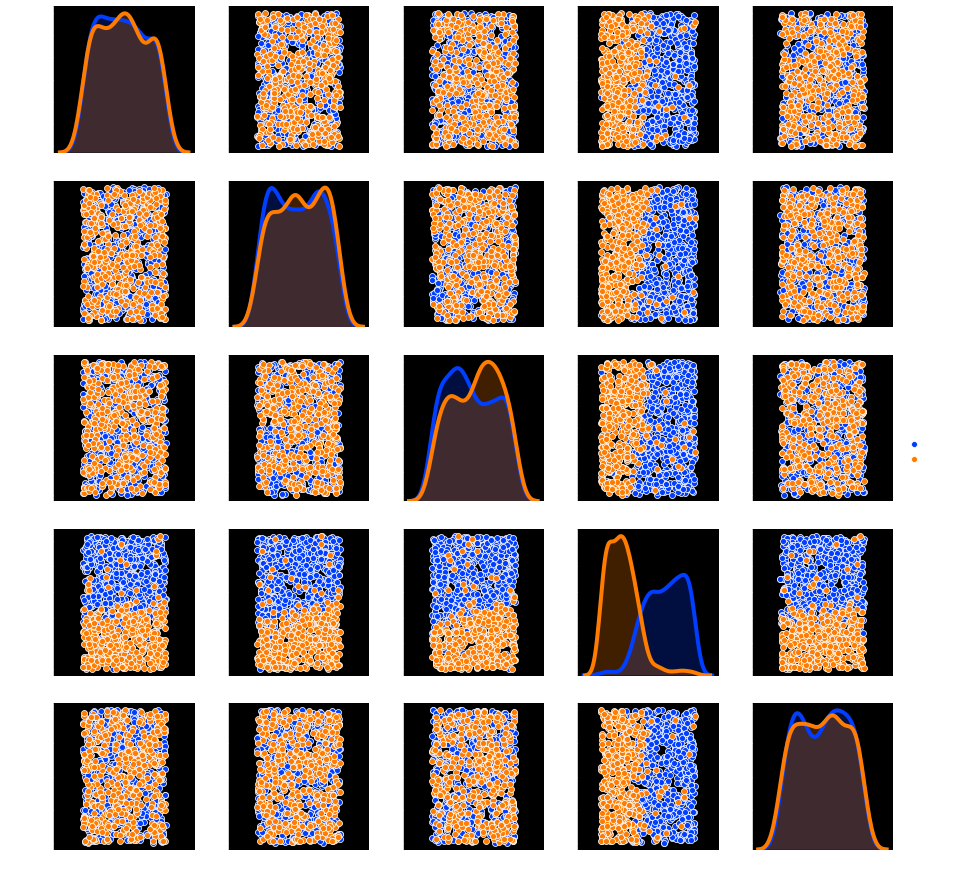

In [20]:
plt.figure(figsize=(10,8))
sns.pairplot(df, kind="scatter", hue="Test",palette='bright')
plt.show()


<font face = "Courier New" size = "3" color=Blue>

- Most of the features show no separability except the features plotted with coolantt flow rate


</font>

## <font face='Courier New' size=5 color=Green>__Plotting 3 features at a time__</font>

In [21]:
le=LabelEncoder()
y=le.fit_transform(df['Test'])
y

@interact
def plot(ColumnX=df.columns[:-1],ColumnY=df.columns[:-1],ColumnZ=df.columns[:-1],Elev=(0,360),Angle=(0,360)):
    fig=plt.figure(figsize=(6,6))
    ax = Axes3D(fig) 
    ax.scatter(df[ColumnX],df[ColumnY],df[ColumnZ],c=le.fit_transform(df['Test']),depthshade=False,cmap='viridis')
    ax.view_init(Elev,Angle)
    ax.set_xlabel('{}'.format(ColumnX))
    ax.set_ylabel('{}'.format(ColumnY))
    ax.set_zlabel('{}'.format(ColumnZ))
    
    plt.show()

interactive(children=(Dropdown(description='ColumnX', options=('Temperature', 'Pressure', 'Feed Flow rate', 'C…

In [22]:
y.shape

(1000,)

## <font face='Courier New' size=5 color=Green>__Analysing the distribution of the features__</font>

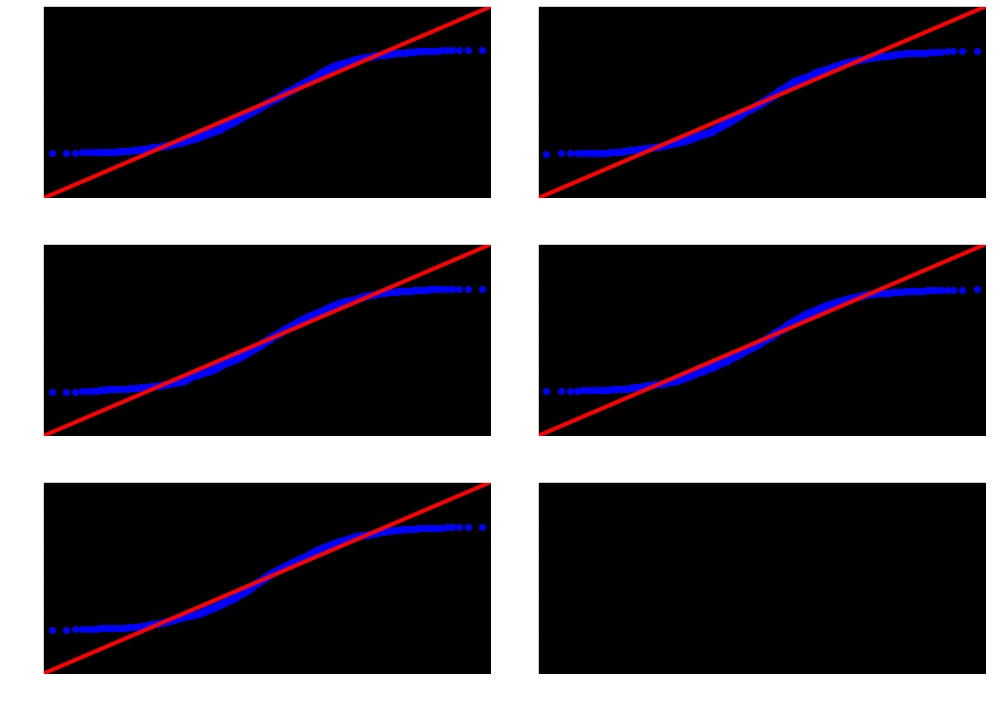

In [23]:
ss=StandardScaler()
t=ss.fit_transform(df.drop(['Test'],axis=1))
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(14,10))
for i,ax in zip(range(5),axes.flat):
    y=sm.qqplot(t[:,i],line='45',ax=ax)
plt.tight_layout()
plt.show()

<font face = "Courier New" size = "3" color=Blue>

- None of the features come from normal distribution
- The data appears to be under-dispersed with respect to a normal distribution
http://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html
-  Under-dispersed data has a reduced number of outliers (i.e. the distribution has thinner tails than a normal distribution)
- Under-dispersed data is also known as having a platykurtic distribution and as having negative excess kurtosis.


</font>

<font face = "Courier New" size = "3" color=Blue>

- All the features come from a similar distribution : they have been standardised to have zero mean and unit variance, but their min, max and kurtosis values are similar as well
- All the features have negative kurtosis
- From the pairplot above, the distribution appears to be multimodal 

</font>

# LDA on the data

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
xtrain_lda = lda.fit_transform(xtrain, ytrain)
xtest_lda = lda.transform(xtest)

/home/shan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


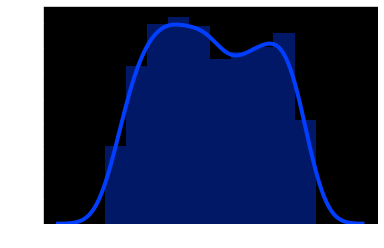

In [25]:
sns.distplot(xtrain_lda)

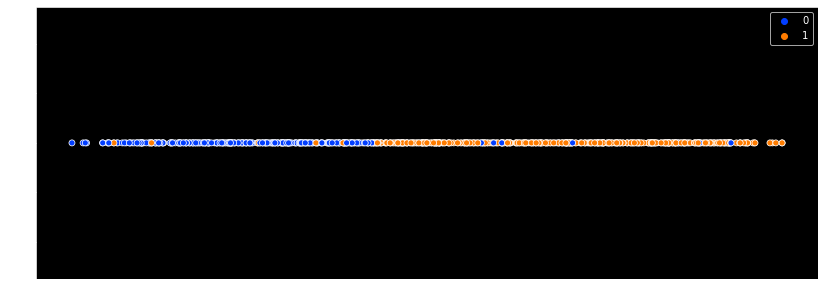

In [26]:
plt.figure(figsize=(14,5))
ax=sns.scatterplot(x=xtrain_lda.reshape(1,-1)[0], y=np.ones_like(xtrain_lda.reshape(1,-1)[0]),hue=ytrain.reshape(1,-1)[0])
plt.show()

<font face='Courier New' size=3 color= Blue>  
- We perform Linear Discriminant analysis on the features - such that we find a new axis which minimises intraclass variation and maximises interclass variation
- If there are 'n' classes, LDA returns 'n-1' axes
- In this case since we have only 2 classes, LDA gives us only 1 axis
- On plotting, we see that the data projected onto this axis is quite separable, however there is some overlap among the classes

# PCA on data

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
xtrain_pca = pca.fit_transform(xtrain)
xtest_pca = pca.transform(xtest)

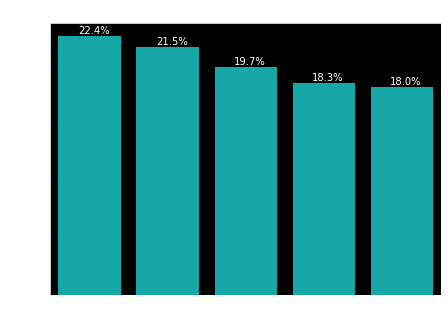

In [28]:
plt.figure(figsize=(7,5))
t = pd.DataFrame({'Variance':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5']})
ax=sns.barplot(x='PC',y="Variance", 
           data=t, color="c")
plt.title('Scree Plot for Principal Components')
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()), (p.get_x()+0.25, p.get_height()+0.002))

<font face='Courier New' size=3 color= Blue>  
- On performing PCA, we get the same number of axes as the number of features in the original dataset however we check the scree plot for principal component axes with maximum variance and choose a few such that the loss in variance is not too high
- However, in this scree plot we see that all 5 Principal Component Axes have similar variances and leaving out one would result in a loss of aboubt 18%. 
- Thus, applying PCA in this siutation is not advisable

# Logistic regression model

In [29]:
def logistic_regression(x,w,b):
    '''x -> data_matrix Nx5
       w -> weight_matrix 1x5
       b -> bias 1x1  broadcasted to Nx1
       output -> sigmoid(x.wT+b) size : Nx1'''
    return 1/(1 + np.exp(-(np.matmul(x,w.T)+b)))

def grad_w(x,ypred,y):
    return np.matmul((ypred-y).T,x)

def grad_b(ypred,y):
    return (ypred - y).mean(axis=0)

def grad_w_mse(x,ypred,y):
    u = (ypred - y)*ypred*(1-ypred)
    #print(u.shape)
    return np.matmul(u.T,x)

def grad_b_mse(ypred,y):
    return ((ypred - y)*ypred*(1-ypred)).mean(axis=0)

def transform(ypred):
    ypred[ypred>=0.5]=1
    ypred[ypred<0.5]=0
    return(ypred)

In [30]:
def fit(xtrain,ytrain,xval=xtest,yval=ytest,epochs=1000,lr=0.01):
    loss_ar=[]
    weights = np.random.randn(1,xtrain.shape[1])
    bias = 0
    test_acc_best=0
    train_acc_best=0
    for epoch in range(epochs):
        
        ypred_train = logistic_regression(xtrain,weights,bias)
        ypred_val = logistic_regression(xval,weights,bias)
        ypred_train_t = transform(ypred_train)
        ypred_val_t = transform(ypred_val)
        
        weights-=lr*grad_w(xtrain,ypred_train,ytrain)
        bias-=lr*grad_b(ypred_train,ytrain)


        loss = mean_squared_error(ytrain,ypred_train)
        loss_ar.append(loss)
        train_acc=accuracy_score(ytrain,ypred_train_t)
        test_acc=accuracy_score(yval,ypred_val_t)
        
        if train_acc>train_acc_best and test_acc>test_acc_best:
            train_acc_best=train_acc.copy()
            test_acc_best=test_acc.copy()
            best_weights=weights
            best_bias=bias
        #print('Epoch {}/{} : Train_accuracy {:.2f}, Validation Accuracy {:.2f}'.format(epoch+1, epochs,train_acc ,test_acc))
    return (loss_ar,best_weights,best_bias,train_acc_best,test_acc_best)

In [31]:
## Original Data
loss_ar,best_weights,best_bias,train_acc_best,test_acc_best=fit(xtrain,ytrain,epochs=1000,lr=0.001)

In [32]:
ypred_orig = logistic_regression(xtest,w=best_weights, b=best_bias)
predictions_orig = [np.round(value) for value in ypred_orig]
f1_score_orig = f1_score(ytest,predictions_orig)
cm_orig = confusion_matrix(predictions_orig,ytest)
print('f1 score',f1_score_orig)
print('Using original dataset best test accuracy is {:.2f}%'.format(100*test_acc_best))
print('Confusion Matrix',cm_orig,sep='\n')

f1 score 0.8970976253298153
Using original dataset best test accuracy is 92.67%
Confusion Matrix
[[ 91   5]
 [ 34 170]]


In [33]:
## LDA Data
loss_ar,best_weights_lda,best_bias_lda,train_acc_best,test_acc_best=fit(xtrain_lda,ytrain,xval=xtest_lda,epochs=2000,lr=0.0001)


In [34]:
ypred_lda = logistic_regression(xtest_lda,w=best_weights_lda, b=best_bias_lda)
predictions_lda = [np.round(value) for value in ypred_lda]
f1_score_lda = f1_score(ytest,predictions_lda)
cm_lda = confusion_matrix(predictions_lda,ytest)
print('f1 score',f1_score_lda)
print('Using LDA dataset best test accuracy is {:.2f}%'.format(100*test_acc_best))
print('Confusion Matrix',cm_lda,sep='\n')

f1 score 0.8895705521472393
Using LDA dataset best test accuracy is 93.33%
Confusion Matrix
[[119  30]
 [  6 145]]


In [35]:
## Coolant Flow Rate
xtrain_cool=np.expand_dims(xtrain[:,3],axis=1)
xtest_cool=np.expand_dims(xtest[:,3],axis=1)
loss_ar,best_weights_cool,best_bias_cool,train_acc_best,test_acc_best=fit(xtrain_cool,ytrain,xval=xtest_cool,epochs=1000,lr=1)


In [36]:
ypred_cool = logistic_regression(xtest_cool,w=best_weights_cool, b=best_bias_cool)
predictions_cool = [np.round(value) for value in ypred_cool]
cm_cool = confusion_matrix(predictions_cool,ytest)
f1_score_cool = f1_score(ytest,predictions_cool)
print('f1 score',f1_score_cool)
print('Using Coolant flow rate best test accuracy is {:.2f}%'.format(100*test_acc_best))
print('Confusion Matrix',cm_cool,sep='\n')

f1 score 0.8714733542319748
Using Coolant flow rate best test accuracy is 91.00%
Confusion Matrix
[[120  36]
 [  5 139]]


<font face='Courier New' size=3 color= Blue>  
- The loss plots show lot of oscillations. These could be due to two reasons:    
    - High Learning rate
    - Instability in the decision boundary due to overlap among classes
- On adjusting the learning rate many times, the oscillations are not removed, thus the decision boundary is unstable
- Best test accuracies are:
    - Original data : 93.33%
    - LDA data: 93.33%
    - Coolant flow rate: 91%
- Here, coolant flow rate alone was chosen to build a model since it displayed clear variation in the distribution for the two classes, we can see that the accuracy is comparable to the one with enture data
    

In [37]:
def roc_auc(ytest,ypred,title=None,color='b'):
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(ytest,ypred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic for {} '.format(title))
    plt.plot(fpr, tpr, color, label = 'AUC {}={:0.2f}'.format(title,roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')


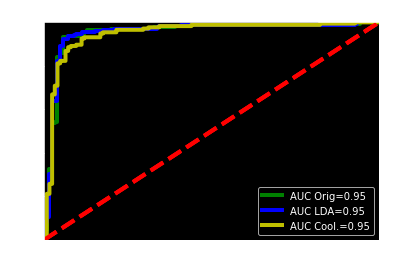

In [38]:
roc_auc(ytest,ypred_orig,title='Orig',color='g')
roc_auc(ytest,ypred_lda,title='LDA',color='b')
roc_auc(ytest,ypred_cool,title='Cool.',color='y')

<font face='Courier New' size=3 color= Blue>  
- From the ROC-AUC curve we can conclude that the LDA model and Coolant Flow Rate model are better than the model trained on the original data since:
    - AUC Original = 0.91
    - AUC LDA = 0.95
    - AUC Coolant Flow Rate = 0.95  
    Higher the AUC, better the model
    
- Combining accuracy, f1 score and AUC, we can conclude that the model trained on LDA data performs the best.  

__ORIGINAL DATA__ 
- f1 score 0.87  
- Confusion Matrix  
105  26  
 20 149
 
__LDA DATA__
- f1 score 0.89
- Confusion Matrix  
120  31  
 5 144
 
__COOLANT FLOW RATE DATA__ 
- f1 score 0.89
- Confusion Matrix  
119  31  
 6 144


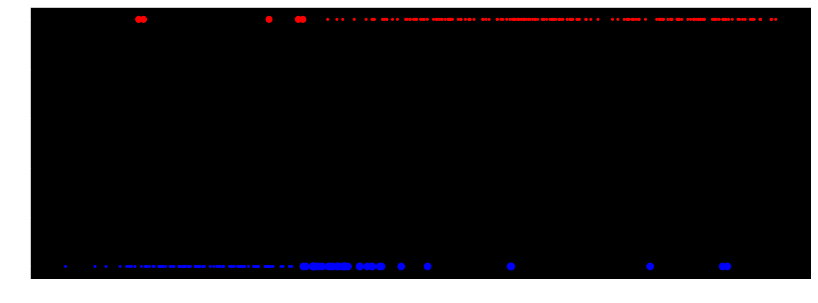

In [39]:
plt.figure(figsize=(14,5))
plt.scatter(xtest_lda, ytest, c=ytest,cmap='bwr' ,s=40*(np.abs(np.sign(predictions_orig-ytest)+0.1)))
plt.show()

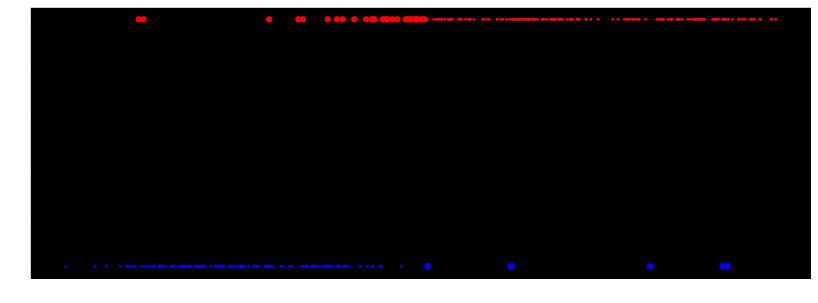

In [40]:
plt.figure(figsize=(14,5))
plt.scatter(xtest_lda, ytest,cmap='bwr', c=ytest, s=30*(np.abs(np.sign(predictions_lda-ytest)+0.1)))
plt.show()

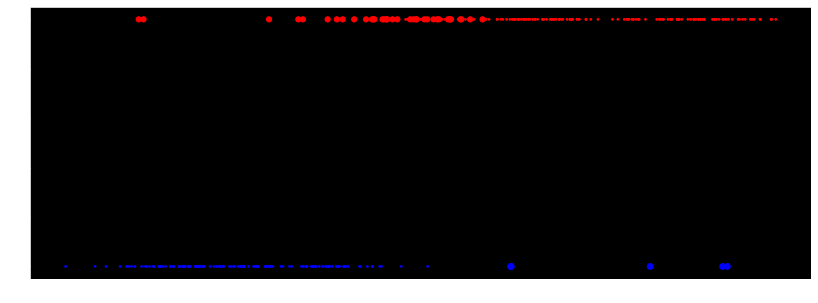

In [41]:
plt.figure(figsize=(14,5))
plt.scatter(xtest_lda, ytest,cmap='bwr', c=ytest, s=30*(np.abs(np.sign(predictions_cool-ytest)+0.1)))
plt.show()

<font face='Courier New' size=3 color= Blue> 
In these plots, the correctly classified points are small in size, while the incorrectly classified points are the large ones
- From this we can get a rough idea of the decision boundary
- Since the data is 5 dimensional, it cannot be plotted directly, thus we use the LDA data to visualise the test set
- We can see that original data model misclassifies more points of class 1 and less of class 0 as compared to LDA data model while the opposite is true with coolant flow rate model

# Using MSE

## Original Data

In [42]:
epochs = 1000
lr=0.09
x=xtrain
y=ytrain
w=np.random.randn(1,x.shape[1])
b=np.asarray([1.5])
loss_ar=[]
for i in range(epochs):
    ypred=logistic_regression(x,w,b)
    w-=grad_w_mse(x,ypred,y)*lr
    b-=grad_b_mse(ypred,y)*lr
    loss_ar.append(mean_squared_error(ypred,y))

In [43]:
ypred_orig = logistic_regression(xtest,w,b)
pred_orig = transform(ypred_orig)
accuracy_score(ytest,pred_orig)

0.92

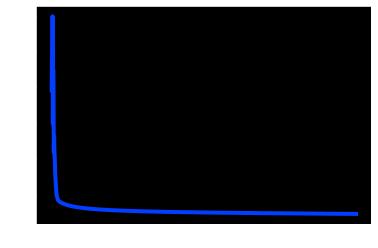

In [44]:
plt.plot(loss_ar)

In [45]:
print('f1_score for Original Data with MSE',f1_score(ytest,pred_orig))
print(confusion_matrix(ytest,pred_orig))

f1_score for Original Data with MSE 0.9322033898305084
[[111  14]
 [ 10 165]]


## LDA Data

In [46]:
epochs = 1000
lr=0.1
x=xtrain_lda
y=ytrain
w=np.random.randn(1,x.shape[1])
b=np.asarray([1.5])
loss_ar=[]
for i in range(epochs):
    ypred=logistic_regression(x,w,b)
    w-=grad_w_mse(x,ypred,y)*lr
    b-=grad_b_mse(ypred,y)*lr
    loss_ar.append(mean_squared_error(ypred,y))

In [47]:
ypred_lda = logistic_regression(xtest_lda,w,b)
pred_lda = transform(ypred_lda)
accuracy_score(ytest,pred_lda)

0.93

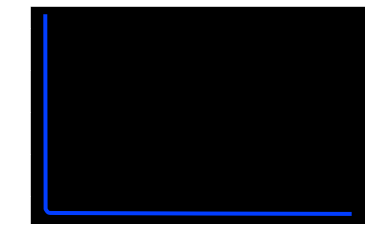

In [48]:
plt.plot(loss_ar)

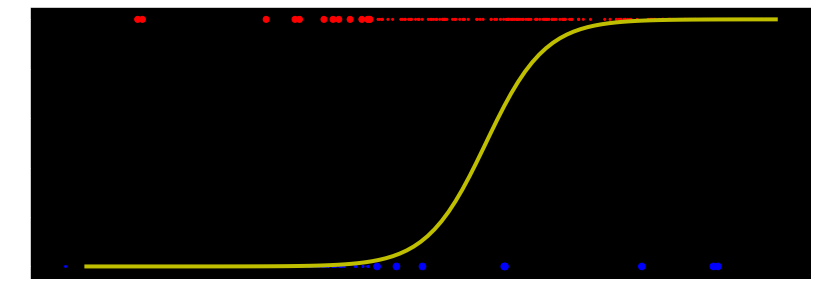

In [49]:
a=np.linspace(-3,3,100).reshape(-1,1)
def sigmoid(a,w=w,b=b):
    return (1/(1+np.exp(-np.matmul(a,w.T)+b)))
plt.figure(figsize=(14,5))
plt.scatter(xtest_lda, ytest, c=ytest,cmap='bwr', s=40*(np.abs(np.sign(pred_lda-ytest)+0.1)))
plt.plot(a,sigmoid(a,w,b),'y')

In [50]:
print('f1_score for LDA Data with MSE',f1_score(ytest,pred_lda))
print(confusion_matrix(ytest,pred_lda))

f1_score for LDA Data with MSE 0.9391304347826087
[[117   8]
 [ 13 162]]


## Coolant Flow Data

In [51]:
epochs = 1000
lr=0.3
x=xtrain_cool
y=ytrain
w=np.random.randn(1,x.shape[1])
b=np.asarray([1.5])
loss_ar=[]
for i in range(epochs):
    ypred=logistic_regression(x,w,b)
    w-=grad_w_mse(x,ypred,y)*lr
    b-=grad_b_mse(ypred,y)*lr
    loss_ar.append(mean_squared_error(ypred,y))

In [52]:
ypred_cool = logistic_regression(xtest_cool,w,b)
pred_cool = transform(ypred_cool)
accuracy_score(ytest,pred_cool)

0.91

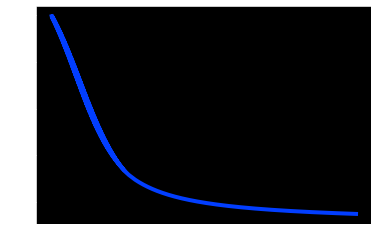

In [53]:
plt.plot(loss_ar)

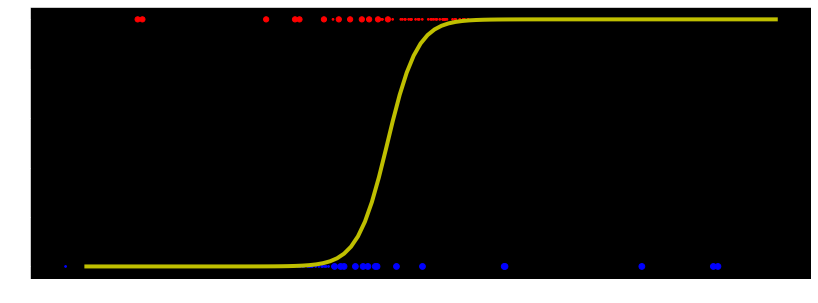

In [54]:
a=np.linspace(-3,3,100).reshape(-1,1)
def sigmoid(a,w=w,b=b):
    return (1/(1+np.exp(-np.matmul(a,w.T)+b)))
plt.figure(figsize=(14,5))
plt.scatter(xtest_lda, ytest, c=ytest,cmap='bwr', s=30*(np.abs(np.sign(pred_cool-ytest)+0.1)))
plt.plot(a,sigmoid(a,w,b),'y')

<font face='Courier New' size=3 color= Blue>  
- In these plots, the points with larger size have been misclassified

In [55]:
print('f1_score for Coolant Flow Rate Data with MSE',f1_score(ytest,pred_cool))
print(confusion_matrix(ytest,pred_cool))

f1_score for Coolant Flow Rate Data with MSE 0.9235127478753541
[[110  15]
 [ 12 163]]


## Summary

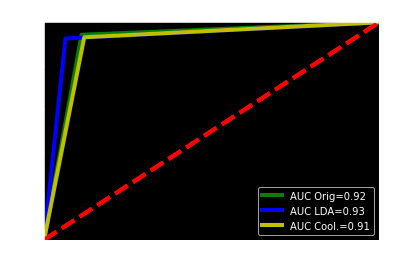

In [56]:
roc_auc(ytest,ypred_orig,title='Orig',color='g')
roc_auc(ytest,ypred_lda,title='LDA',color='b')
roc_auc(ytest,ypred_cool,title='Cool.',color='y')

<font face='Courier New' size=3 color= Blue>  
    
    
Mean Squared Error  


__ORIGINAL DATA__ 
- Accuracy : 92%
- f1 score 0.93  
- Confusion Matrix  
111  14  
10 165
 
__LDA DATA__
- Accuracy : 92.7%
- f1 score 0.94
- Confusion Matrix  
117   8  
13 162
 
__COOLANT FLOW RATE DATA__ 
- Accuracy : 91% 
- f1 score 0.92
- Confusion Matrix  
110  15  
12 163
***
- We see that the f1 scores are higher even though the AUC has decreased for all models